In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_wine



In [3]:
wine =load_wine()

In [6]:
features = pd.DataFrame(wine.data,columns=wine.feature_names)
target = pd.DataFrame(wine.target,columns=['TARGET'])

data = pd.concat([features,target],axis=1)


In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
x1 = np.array(data['hue'])
x2 = np.array(data['proline'])
y= np.array(data['TARGET'])

In [9]:
x = np.column_stack((x1,x2))

In [10]:
x.shape

(178, 2)

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [13]:
scaler = MinMaxScaler()

In [14]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [15]:
int(np.sqrt(len(xtrain)))

11

In [16]:
classifier = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2) # minkowski is a parameter to cal. distance

In [17]:
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [19]:
ypred = classifier.predict(xtest)

In [20]:
ypred

array([0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0])

In [21]:
cm = confusion_matrix(ytest,ypred)

In [22]:
cm

array([[12,  3,  0],
       [ 0, 13,  0],
       [ 0,  1,  7]], dtype=int64)

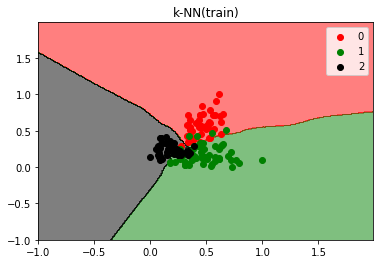

In [25]:
x_set,y_set = xtrain,ytrain

x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
                   
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                     alpha=0.5,cmap=ListedColormap(('red','green','black')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
                c = ListedColormap(('red','green','black'))(i),label=j)
             
plt.title('k-NN(train)')
plt.legend()

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.8888888888888888
